<a href="https://colab.research.google.com/github/yy0750/Study_ML_Project/blob/main/prediction_of_population_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 데이터 불러오기

In [30]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Dacon/prediction of population income/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/prediction of population income/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/prediction of population income/sample_submission.csv')

# 2. 데이터 확인하기

In [5]:
display(train.head(5))
display(test.head(5))
display(submission.head(5))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


,ID,Income
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


# 3. 데이터 정보 확인

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

# 4. 수치형(numerical) 데이터 기술통계량 확인

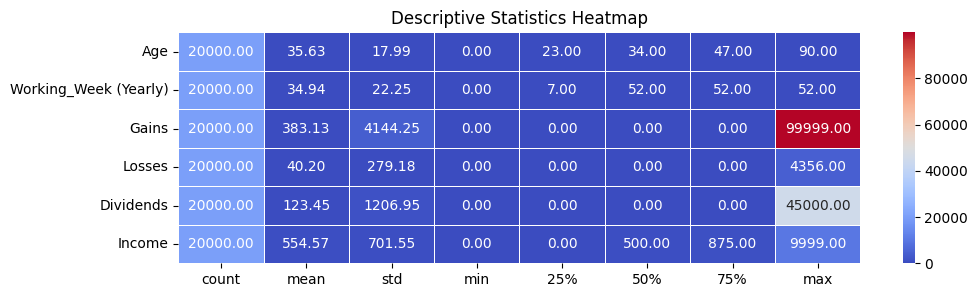

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

description = train.describe().T

fig, axs = plt.subplots(figsize=(11, 3))
sns.heatmap(description, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, ax=axs)
axs.set_title('Descriptive Statistics Heatmap')
plt.show()

# 5. 범주형(categorical) 데이터 기술통계량 확인


In [8]:
train_drop = train.drop(['ID'],axis = 1)

train_drop.describe(include=['object']).T

,count,unique,top,freq
Gender,20000,2,F,10472
Education_Status,20000,17,High graduate,6494
Employment_Status,20000,8,Children or Armed Forces,11142
Industry_Status,20000,24,Not in universe or children,4688
Occupation_Status,20000,15,Unknown,4688
Race,20000,5,White,16845
Hispanic_Origin,20000,10,All other,17769
Martial_Status,20000,7,Married,9554
Household_Status,20000,31,Householder,6087
Household_Summary,20000,8,Householder,8552


# 6. 범주형 피처(feature) 고유값 출력

In [ ]:
categorical_Eng = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
categorical_Kor = ['근로 형태', '교육', '결혼 상태', '직업', '가족 관계', '인종', '성별', '국적']

for Eng, Kor in zip(categorical_Eng, categorical_Kor ):
    unique_values = train[Eng].unique().tolist()
    print('\n {0} ({1})\n'.format(Eng, Kor), unique_values)

KeyError: 'workclass'

In [31]:
# 데이터 분할 및 전처리
train_x = train.drop(columns=['ID', 'Income'])
train_y = train['Income']
test_x = test.drop(columns=['ID'])

In [32]:
# 범주형 변수 수치화
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)
for i in encoding_target:
    le = LabelEncoder()

    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    train_x[i] = train_x[i].astype(str)
    test_x[i] = test_x[i].astype(str)

    le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])

    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    test_x[i] = le.transform(test_x[i])


test_x.head()

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,79,1,9,0,0,14,14,4,0,5,...,4,2,39,40,40,5,0,0,0,1
1,47,1,7,0,0,14,14,4,8,5,...,0,2,39,39,39,4,0,0,0,1
2,18,0,9,0,52,19,11,4,0,5,...,0,2,39,39,39,5,0,0,0,1
3,39,0,1,2,30,12,11,4,0,1,...,7,2,39,39,39,2,0,0,0,2
4,6,1,3,0,0,14,14,4,6,5,...,2,2,39,39,39,4,0,0,0,2


In [29]:
# # train_x와 test_x에서 'Gender' 열 변환
# train_x['Gender'] = train_x['Gender'].map({'M': 1, 'F': 0})
# test_x['Gender'] = test_x['Gender'].map({'M': 1, 'F': 0})

# test_x.head()

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,79,NaN,9,0,0,14,14,4,0,5,...,4,2,39,40,40,5,0,0,0,1
1,47,NaN,7,0,0,14,14,4,8,5,...,0,2,39,39,39,4,0,0,0,1
2,18,NaN,9,0,52,19,11,4,0,5,...,0,2,39,39,39,5,0,0,0,1
3,39,NaN,1,2,30,12,11,4,0,1,...,7,2,39,39,39,2,0,0,0,2
4,6,NaN,3,0,0,14,14,4,6,5,...,2,2,39,39,39,4,0,0,0,2


In [33]:
# 선형 회귀 모델 초기화 및 훈련
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [37]:
test

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TEST_9995,31,M,Bachelors degree,Children or Armed Forces,52,Other professional services,Technicians & Support,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
9996,TEST_9996,27,M,College,Children or Armed Forces,52,Retail,Handlers/Cleaners,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median
9997,TEST_9997,18,M,High graduate,Children or Armed Forces,7,Retail,Services,Black,All other,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
9998,TEST_9998,9,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median


In [36]:
from sklearn.metrics import mean_squared_error
# 테스트 데이터에 대한 예측
predictions = model.predict(test_x)

# RMSE 계산
rmse = mean_squared_error(test_y, predictions, squared=False)
rmse

NameError: name 'test_y' is not defined